#Taller 2 - Estimacion puntual con SLIT
###Integrantes:
#####Daniel Steven Lozada - 1010148612
#####Federico Lopez - 1002576446
#####Santiago Erazo Mora - 1082658664

In [ ]:
!pip install lcapy==1.14
!pip install folium==0.2.1
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended 
!sudo apt install texlive-latex-extra
!sudo apt install dvipng
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-recommended is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-extra is already the newest version (2019.202000218-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Looking in indexes: https://p

In [ ]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import gamma
from lcapy import Circuit, j , omega, s
from lcapy import *

from scipy.signal import lti
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy.fftpack import fft,fftfreq,fftshift
import seaborn as sns  ##HISTOGRAMAS
from numpy import logspace
import sympy as sym

#Funciones de Verosimilitud y log_Verosimilitud

In [ ]:
#Funciones
def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

def neg_log_likelihood(params, x):
    mu, sigma = params
    return -np.sum(np.log(gaussian(x, mu, sigma)))

def fit_gaussian(x):
    result = minimize(neg_log_likelihood, [0, 1], args=(x,))
    mu, sigma = result.x
    return mu, sigma

def log_likelihood(lmbda, data):
    n = len(data)
    return n * np.log(lmbda) - lmbda * np.sum(data)

def log_likelihood_Poisson(lmbda, data):
    n = len(data)
    return n * np.log(lmbda) - lmbda * np.sum(data) - np.sum(np.log(gamma(data+1)))

#Circuito Pasabandas

In [ ]:
ctt=Circuit(
"""
    Vi 1 0_1 step;down
    C1 1 2; right, size=1.5
    R1 2 0; down, size=1.5
    R2 2 3; right, size=1.5
    C2 3 0_2; right, size=1.5
    
    
    W 0_1 0;right
    W 0 0_2;right
    

"""
)

#Funcion de transferencia

In [ ]:
H=(ctt.C2.V(s)/ctt.Vi.V(s)).simplify()
H

                   C₁⋅R₁⋅s                    
──────────────────────────────────────────────
             2                                
C₁⋅C₂⋅R₁⋅R₂⋅s  + s⋅(C₁⋅R₁ + C₂⋅R₁ + C₂⋅R₂) + 1

#Valores capacitivos y resistivos

In [ ]:
C1=4.7e-4
C2=4.7e-4
R1=2000
R2=2000

Coeficientes_num=[C1*R1,0]
Coeficientes_dem=[C1*C2*R2*R1,C1*R1+C2*R1+C2*R2,1]

In [ ]:
import control

#Grafica de funcion de transferencia con su frecuencia de corte

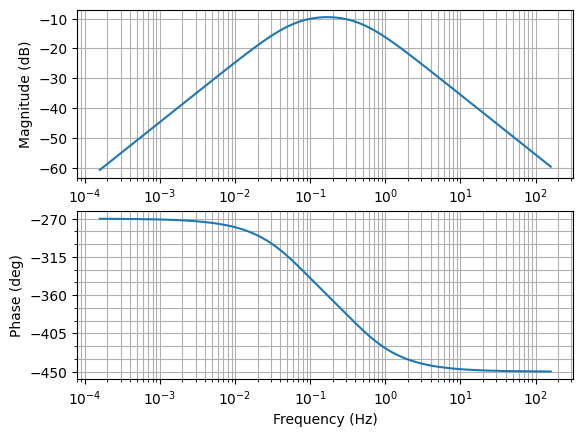

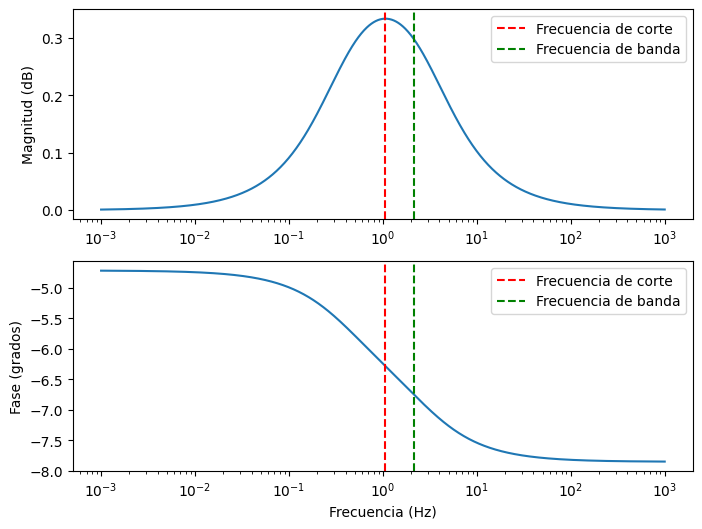

In [ ]:
sys = control.TransferFunction(Coeficientes_num, Coeficientes_dem)  # Crear el sistema LTI
dt = 0.002  # Base de tiempo deseada en segundos
sys_d = control.c2d(sys, dt)

# Definir el rango de frecuencias
omega = np.logspace(-3, 3, num=1000)

# Obtener la respuesta en frecuencia
mag, phase, omega = control.bode(sys, omega, dB=True, Hz=True)

f0 = 1/(np.sqrt(C1*C2*R1*R2))
B = 1 / (R1 * C1) + 1 / (R2 * C2)

# Graficar la respuesta en frecuencia
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.semilogx(omega, mag)
ax1.set_ylabel('Magnitud (dB)')
ax1.axvline(f0, color='red', linestyle='--', label='Frecuencia de corte')
ax1.axvline(B, color='green', linestyle='--', label='Frecuencia de banda')
ax1.legend()

ax2.semilogx(omega, phase)
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase (grados)')
ax2.axvline(f0, color='red', linestyle='--', label='Frecuencia de corte')
ax2.axvline(B, color='green', linestyle='--', label='Frecuencia de banda')
ax2.legend()

plt.show()

In [ ]:
print(sys_d)


0.002121 z - 0.002121
----------------------
z^2 - 1.994 z + 0.9936

dt = 0.002



(array([0.00939709, 0.00948407, 0.00957186, 0.00966046, 0.00974988,
        0.00984012, 0.0099312 , 0.01002312, 0.01011589, 0.01020952,
        0.01030401, 0.01039938, 0.01049562, 0.01059276, 0.01069079,
        0.01078973, 0.01088959, 0.01099036, 0.01109207, 0.01119472,
        0.01129831, 0.01140287, 0.01150838, 0.01161488, 0.01172235,
        0.01183082, 0.01194029, 0.01205077, 0.01216228, 0.01227481,
        0.01238838, 0.012503  , 0.01261867, 0.01273542, 0.01285324,
        0.01297215, 0.01309215, 0.01321327, 0.0133355 , 0.01345886,
        0.01358336, 0.01370901, 0.01383581, 0.01396379, 0.01409294,
        0.01422329, 0.01435484, 0.0144876 , 0.01462159, 0.01475681,
        0.01489328, 0.01503101, 0.01517001, 0.01531029, 0.01545186,
        0.01559473, 0.01573892, 0.01588444, 0.01603131, 0.01617952,
        0.0163291 , 0.01648006, 0.0166324 , 0.01678615, 0.01694132,
        0.01709791, 0.01725595, 0.01741544, 0.0175764 , 0.01773884,
        0.01790277, 0.01806821, 0.01823517, 0.01

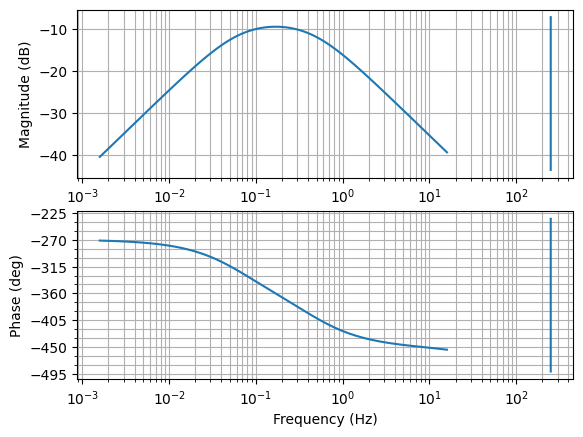

In [ ]:
# Ajustar el rango de frecuencias
frequencies = np.logspace(-2, 2, num=1000)  # Generar una lista de frecuencias en escala logarítmica

# Graficar la respuesta en frecuencia
control.bode_plot(sys_d, omega=frequencies, dB=True, Hz=True)

#Respuesta impulso

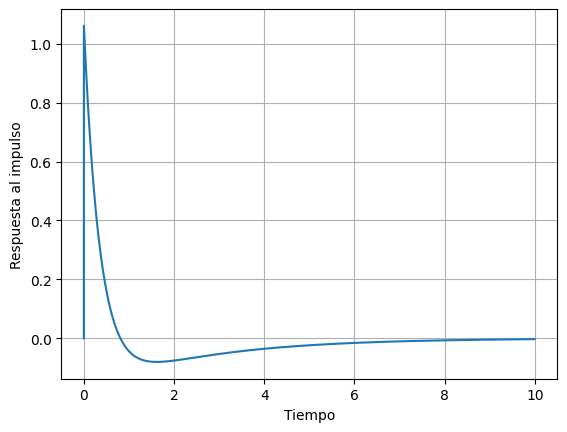

In [ ]:
t, y = control.impulse_response(sys_d)
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Respuesta al impulso')
plt.grid(True)
plt.show()

#FDP poisson y estimacion por maxima verosimilitud

<ipython-input-40-7cfb25b375df>:20: RuntimeWarning: divide by zero encountered in log
  return n * np.log(lmbda) - lmbda * np.sum(data) - np.sum(np.log(gamma(data+1)))


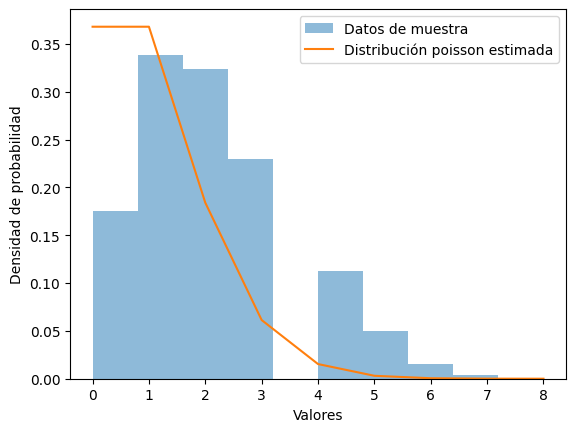

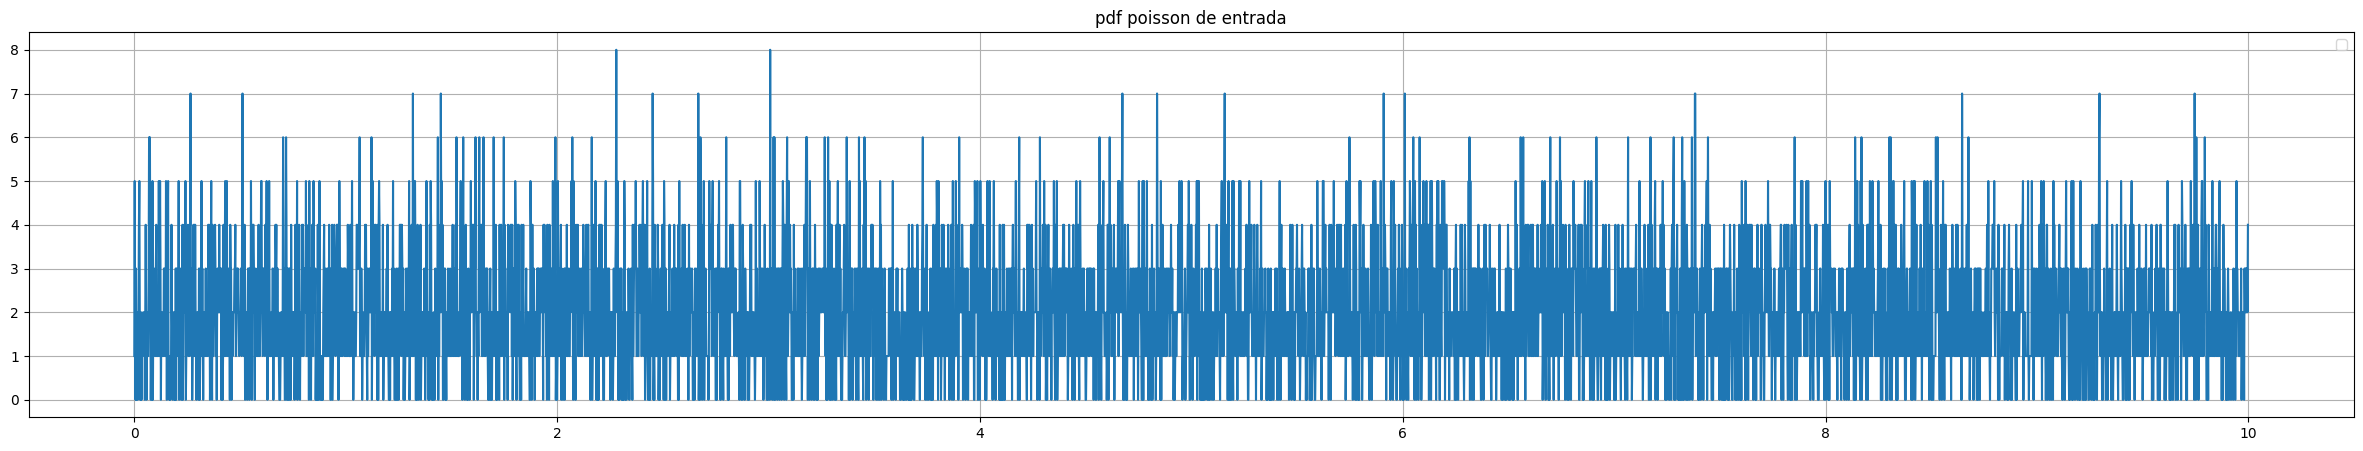

In [ ]:
t=np.arange(0,10,dt) ## DEFINIMOS EL ESPACIADO DEL SISTEMA PARA CUADRAR LAS BASES DE TIEMPO
lmbda = 2 #Tasa de ocurrencias
n = len(t) # numero de muestras

u = np.random.poisson(lmbda,size=n)

# Función de log-verosimilitud para una distribución gaussiana
def log_likelihood(params, data):
    lmbda = params  # Parámetros a estimar: media y desviación estándar
    N = len(data)  # Número de muestras
    log_likelihood = n * np.log(lmbda) - lmbda * np.sum(data) - np.sum(np.log(gamma(data+1)))      #  -0.5 * N * np.log(2 * np.pi) - N * np.log(sigma) - np.sum((data - mu) ** 2) / (2 * sigma ** 2)  # Fórmula de log-verosimilitud para una distribución gaussiana
    return -log_likelihood  # Se devuelve el negativo del log-verosimilitud para minimizar

# Estimación de máxima verosimilitud de la tasa de ocurrencia de eventos lambda
result = minimize(lambda lmbda: -log_likelihood_Poisson(lmbda, u), x0=1, method='L-BFGS-B')
lmbda_hat = result.x[0]

# Generar una grilla de valores para graficar la distribución de Poisson estimada
x = np.arange(0, np.max(u)+1)
pmf = np.exp(-lmbda_hat) * np.power(lmbda_hat, x) / gamma(x+1)


# Graficar los datos de muestra y la distribución gaussiana estimada
plt.hist(u, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.plot(x, pmf, label='Distribución poisson estimada')  # Graficar la distribución gaussiana estimada
plt.legend()  # Agregar leyenda a la gráfica
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica

plt.figure(figsize=(30,5))
plt.plot(t,u)
plt.title("pdf poisson de entrada")
plt.grid()
plt.legend()


#Salida del sistema 

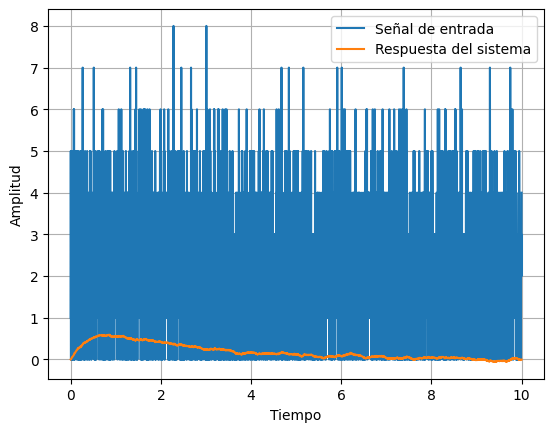

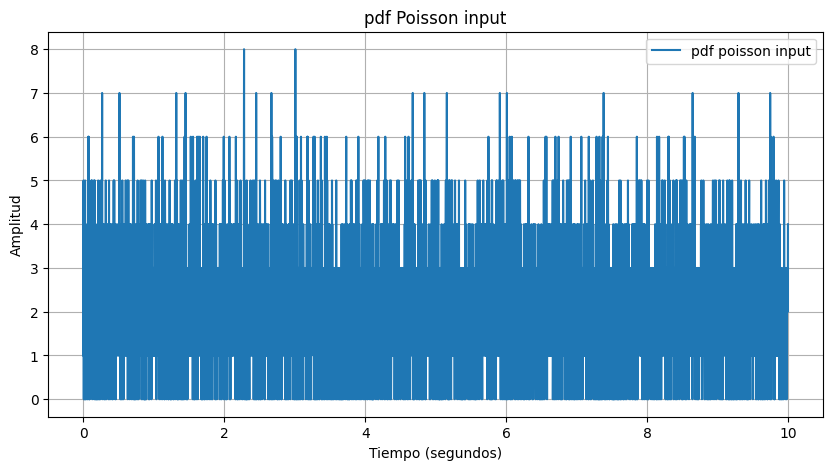

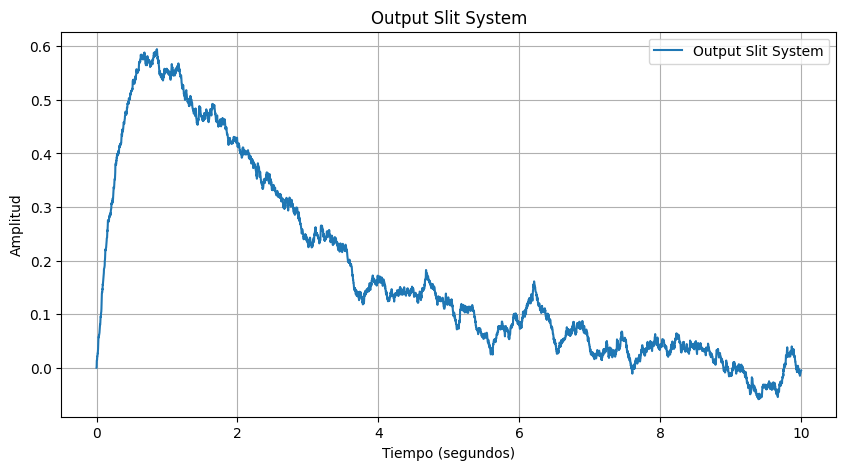

<Figure size 1000x500 with 0 Axes>

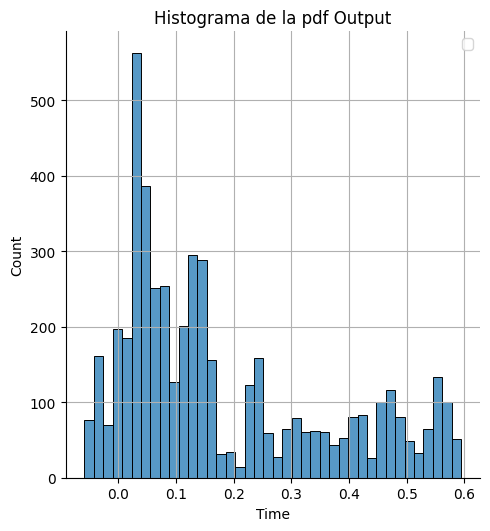

In [ ]:
## CALCULANDO LA SALIDA DEL SISTEMA
# Simular la respuesta del sistema a la señal de entrada
t_out, y_1 = control.forced_response(sys_d, T=t, U=u)

plt.plot(t, u, label='Señal de entrada')
plt.plot(t_out, y_1, label='Respuesta del sistema')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

#pdf POISSON Input
plt.figure(figsize=(10,5))
plt.title("pdf Poisson input")
plt.plot(t, u,label="pdf poisson input")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

#pdf Output:
plt.figure(figsize=(10,5))
plt.title("Output Slit System")
plt.plot(t, y_1,label="Output Slit System")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

#Histograma de la pdf Output:
plt.figure(figsize=(10,5))
sns.displot(y_1,bins=40)
hist_kws={"edgecolor":"balck"}
plt.title("Histograma de la pdf Output")
plt.xlabel("Time")
plt.grid()
plt.legend()

#Convolucion entre la entrada y la respuesta impulso

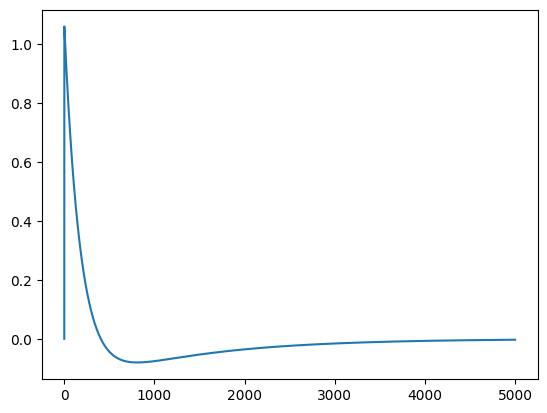

In [ ]:
#Convolucion de entrada y ecuacion de transfer
y_2 = np.convolve(u, y, mode='same')  # Salida del circuito
plt.plot(y)  # Graficar la señal de entrad

#Estimacion puntual por maxima verosimilitud de la salida del circuito

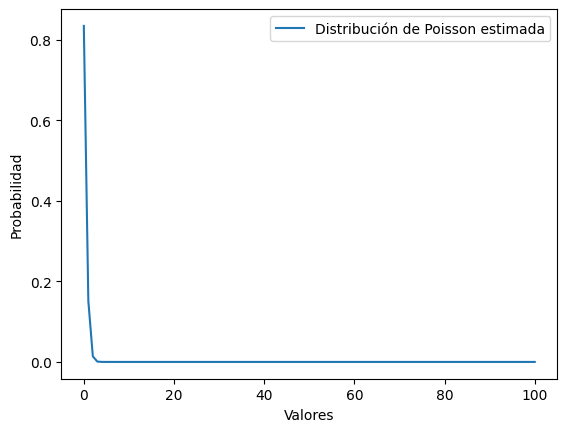

Lambda estimado: 0.18140843160370143


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Función de log-verosimilitud para una distribución de Poisson
def log_likelihood_poisson(lambd, y):
    log_likelihood = -lambd * np.sum(y) + len(y) * np.log(lambd) - np.sum(np.log(factorial(y)))
    return -log_likelihood

# Estimación de máxima verosimilitud de la tasa de ocurrencia de eventos lambda
lmbda_hat = np.mean(y_1)  # Estimación inicial de lambda como la media de la señal de salida

# Optimización de la estimación de lambda mediante iteraciones
for _ in range(10):
    numerator = np.sum(y_1)
    denominator = len(y_1)
    lmbda_hat_new = numerator / denominator
    if np.isclose(lmbda_hat_new, lmbda_hat):
        break
    lmbda_hat = lmbda_hat_new

# Generar una grilla de valores para graficar la distribución de Poisson estimada
x = np.arange(0, np.max(y_1) + 100)
pmf = np.exp(-lmbda_hat) * np.power(lmbda_hat, x) / factorial(x)

# Graficar la distribución de Poisson estimada
plt.plot(x, pmf, label='Distribución de Poisson estimada')
plt.legend()
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.show()

print("Lambda estimado:", lmbda_hat)